### Experimento 1.1

#### Descrição do experimento

Neste primeiro experimento o CCScore será executado sobre o conjunto de redações e faremos uma avaliação direta do valor obtido, com os valores da Competência 4 do conjunto de redações. 

Deseja-se avaliar se o cálculo do índice de coesão utilizado em Nobre (2011) pode ser suficiente para determinar o valor da coesão das redações. Para isso faremos uma comparação direta dos valores e as diferenças absolutas entre os valores obtidos serão considerados.

### Dados do conjunto de redações utilizados

O dataset de redações foi obtido a partir dos arquivos de redações do projeto BrasilEscola. 

As competência de maneira resumida, avaliam os seguintes aspectos da redação:
<pre>
Ortografia        ==  Competência 1
Adequação ao tema ==  Competência 2
Coerência         ==  Competência 3
Coesão            ==  Competência 4
Ética             ==  Competência 5
</pre>

O que é esperado de cada competência:
<ul>
<li><strong>Competência 1</strong>: Demonstrar domínio da norma culta da língua escrita.</li>   
<li><strong>Competência 2</strong>: Compreender a proposta da redação e aplicar conceito das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo.</li>
<li><strong>Competência 3</strong>: Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.</li>
<li><strong>Competência 4</strong>: Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.</li>
<li><strong>Competência 5</strong>: Elaborar a proposta de solução para o problema abordado, mostrando respeito aos valores humanos e considerando a diversidade sociocultural.</li>
</ul>

In [1]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
import matplotlib
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument

### Carga do conjunto de dados da redações

As colunas contém:

<ol>
    <li>Texto: Texto original da redação. </li>
    <li>Nota: Nota total da redação (0-1000), considerando as 5 competências. </li>
    <li>Competência 1: Nota da Competência 1 (0-200)</li>
    <li>Competência 2: Nota da Competência 2 (0-200)</li>
    <li>Competência 3: Nota da Competência 3 (0-200)</li>
    <li>Competência 4: Nota da Competência 4 (0-200)</li>
    <li>Competência 5: Nota da Competência 5 (0-200)</li>
    <li>Qtd palavras:  Quantidade de palavras do texto</li>
    <li>Cadeias: Cadeias de Correferência obtidas com o CORP</li>
    <li>Palavras: Anotações sintáticas e semânticas do parser PALAVRAS</li>
    <li>Erros: Erros gramaticais encontrados pelo corretor CoGroo</li>
    <li>Entidades: Entidades detectadas pelo processo de vinculação de entidades</li>
    <li>Coesão Calculada: Valor da coesão calculada pelo CCScore</li>
<ol>

In [2]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))


In [3]:
resultados_exp_1_1 = pickle.load(open('../ccscore/data/resultados_exp_1_1.pickle', 'rb'))
df_redacao['Coesão Calculada'] = resultados_exp_1_1['valores_coesao'].values()
df_redacao

,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades,Coesão Calculada
0,"Jornais, novelas e anúncios publicitários, a t...",700.0,"Jornais, novelas e anúncios publicitários, a t...",150.0,150.0,150.0,150.0,100.0,333,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '2')...",\nJornais \t[jornal] <*> <sem-r> N M P @TOP #...,[[xml:118] Verificou-se erro de concordância e...,"{'TV': {'label': 16544881809274863474, 'kb_id'...",150.00
1,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.00
2,A proibição ou permissão de fumantes em locais...,800.0,A proibição ou permissão de fumantes em locais...,150.0,200.0,150.0,150.0,150.0,323,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nproib...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'de São Paulo': {'label': 385, 'kb_id': 'Q175...",150.00
3,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.00
4,"Política, uma palavra que pode ter uma definiç...",500.0,"Política, uma palavra que pode ter uma definiç...",100.0,100.0,100.0,100.0,100.0,255,"{'Cadeia_10': {'sn': [OrderedDict([('@id', '10...",\nPolítica \t[político] <*> ADJ F S @PRED> #1...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Política': {'label': 16544881809274863474, '...",100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,"O toque de recolher, à noite, imposto aos jove...",750.0,"O toque de recolher, à noite, imposto aos jove...",100.0,150.0,150.0,150.0,200.0,291,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nO \t[o] <clb> <*> <artd> DET M S @>N #1->2\...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'anos': {'label': 16544881809274863474, 'kb_i...",115.71
2596,As manifestações populares podem contribuir pa...,750.0,As manifestações populares podem contribuir pa...,150.0,150.0,150.0,150.0,150.0,312,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAs \t[o] <*> <artd> DET F P @>N #1->2\nmani...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Presidente': {'label': 7654241940133152407, ...",76.21
2597,Anualmente as universidades brasileiras concen...,650.0,Anualmente as universidades brasileiras concen...,150.0,150.0,100.0,150.0,100.0,265,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAnualmente \t[anualmente] <*> ADV @ADVL> #1...,[[probs:paronyms] Possível confusão entre divi...,"{'negros': {'label': 16544881809274863474, 'kb...",87.80
2598,"A cada período eleitoral, surgem campanhas de ...",750.0,"A cada período eleitoral, surgem campanhas de ...",150.0,150.0,150.0,150.0,150.0,345,"{'Cadeia_2': {'sn': [OrderedDict([('@id', '2')...",\nA \t[a] <*> PRP @ADVL> #1->6\ncada \t[cada]...,[[punctuation:BEFORE_SENTENCES] Pontuação no i...,"{'Constituição velha': {'label': 383, 'kb_id':...",84.62


In [4]:
def exibe_redacao(num_redacao, show_text=True):    
    texto = df_redacao['Texto'][num_redacao]
    anot_pal = df_redacao['Palavras'][num_redacao]
    nota_compt4 = df_redacao['Competência 4'][num_redacao]    
    coesao_calculada = df_redacao['Coesão Calculada'][num_redacao]

    print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4} - Coesão Calculada: {coesao_calculada}\n")
    if show_text:
        print(texto)


O resultado a seguir mostra que o avaliador automático não atribuiu nota zero para nenhuma das redações. Diferentemento do avaliador que em algumas situações atribuiu esse valor. 

In [5]:
print("======== Experimento 1 ========")
print(f"Notas 0.0 atribuídas pelo corretor automático: {len(df_redacao[df_redacao['Coesão Calculada'] == 0.0])}")
print(f"Notas 0.0 atribuídas pelo corretor humano: {len(df_redacao[df_redacao['Competência 4'] == 0.0])}")

======== Experimento 1 ========
Notas 0.0 atribuídas pelo corretor automático: 0
Notas 0.0 atribuídas pelo corretor humano: 47


A seguir calcula-se a diferença entre o valor da coesão calculada pelo CCScore e a nota dada peloa avaliador humano, bem como o valor da diferença absoluta. 

In [6]:
df_redacao['diferenca'] = df_redacao['Competência 4'] - df_redacao['Coesão Calculada']
df_redacao['diferenca_abs'] = abs(df_redacao['diferenca'])


In [7]:
df_redacao[['Competência 4',
            'Coesão Calculada', 'diferenca', 'diferenca_abs']]


,Competência 4,Coesão Calculada,diferenca,diferenca_abs
0,150.0,150.00,0.00,0.00
1,100.0,100.00,0.00,0.00
2,150.0,150.00,0.00,0.00
3,100.0,100.00,0.00,0.00
4,100.0,100.00,0.00,0.00
...,...,...,...,...
2595,150.0,115.71,34.29,34.29
2596,150.0,76.21,73.79,73.79
2597,150.0,87.80,62.20,62.20
2598,150.0,84.62,65.38,65.38


#### Distribuição das Notas da Competência 4 das redações

<AxesSubplot:ylabel='Frequency'>

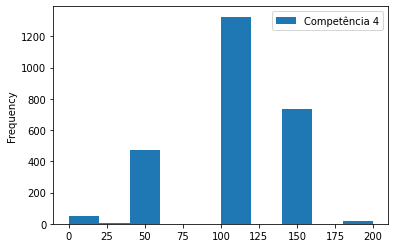

In [8]:
df_redacao[['Competência 4']].plot.hist()

#### Distribuição dos valores calculados de coesão

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:ylabel='Frequency'>

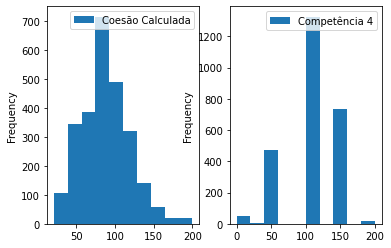

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

df_redacao[['Coesão Calculada']].plot.hist(ax=axes[0])
df_redacao[['Competência 4']].plot.hist(ax=axes[1])

<AxesSubplot:ylabel='Frequency'>

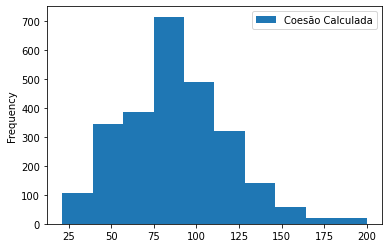

In [10]:
df_redacao[['Coesão Calculada']].plot.hist()

#### Avaliação das diferenças absolutas entre a Coesão Calculada e os valores da Competência 4 atribuidos pelo avaliador

A seguir temos uma distribuição dos valores absolutos da diferença entre os valores atribuidos pelos corretores humanos e o processo avaliação automática. 


<AxesSubplot:ylabel='Frequency'>

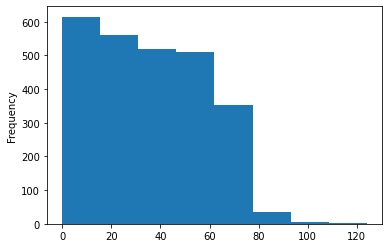

In [11]:
df_redacao['diferenca_abs'].plot.hist(bins = 8)


O valor absoluto da diferença média entre a nota do avaliador humano e a avaliação automática foi de 35.86 pontos, com desvio-padrão de 22,23. Enquanto o desvio-padrão apresentado pelo avaliador humano foi de 103,95.
A diferença máxima da diferença absoluta foi de 124,04 pontos. 
Chama a atenção do fato da avaliação automática não ter atribuído nota 0 (zero) a nenhuma redação. Diferentemente do avaliador humano e não ter dado nota máxima a nenhuma redação. Possivelmente, isso pode se dar por conta de aspectos da coesão que avaliação automática não esteja considerando ou que não possam ser capturados pelo método.

In [12]:
df_redacao[['Competência 4','Coesão Calculada', 'diferenca_abs']].describe()

,Competência 4,Coesão Calculada,diferenca_abs
count,2600.000000,2600.000000,2600.000000
mean,103.957692,87.835142,35.867527
std,37.421588,30.622394,22.231708
min,0.000000,21.210000,0.000000
25%,100.000000,65.620000,16.460000
50%,100.000000,86.710000,34.500000
75%,150.000000,106.670000,54.170000
max,200.000000,200.000000,124.040000


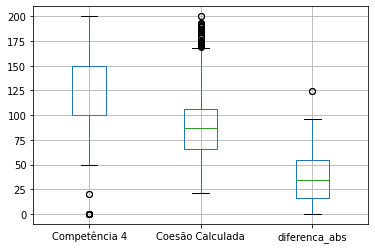

In [13]:
boxplot = df_redacao.boxplot(column=['Competência 4', 
                                     'Coesão Calculada', 'diferenca_abs', 
                                     ])


In [14]:
dif_zero = df_redacao[df_redacao['diferenca'] == 0.0]
print(f"Total de linhas: {dif_zero.shape[0]}")
dif_zero


Total de linhas: 34


,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades,Coesão Calculada,diferenca,diferenca_abs
0,"Jornais, novelas e anúncios publicitários, a t...",700.0,"Jornais, novelas e anúncios publicitários, a t...",150.0,150.0,150.0,150.0,100.0,333,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '2')...",\nJornais \t[jornal] <*> <sem-r> N M P @TOP #...,[[xml:118] Verificou-se erro de concordância e...,"{'TV': {'label': 16544881809274863474, 'kb_id'...",150.0,0.0,0.0
1,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.0,0.0,0.0
2,A proibição ou permissão de fumantes em locais...,800.0,A proibição ou permissão de fumantes em locais...,150.0,200.0,150.0,150.0,150.0,323,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nproib...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'de São Paulo': {'label': 385, 'kb_id': 'Q175...",150.0,0.0,0.0
3,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.0,0.0,0.0
4,"Política, uma palavra que pode ter uma definiç...",500.0,"Política, uma palavra que pode ter uma definiç...",100.0,100.0,100.0,100.0,100.0,255,"{'Cadeia_10': {'sn': [OrderedDict([('@id', '10...",\nPolítica \t[político] <*> ADJ F S @PRED> #1...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Política': {'label': 16544881809274863474, '...",100.0,0.0,0.0
5,Com uma educação de qualidade e disciplina exe...,300.0,Com uma educação de qualidade e disciplina exe...,50.0,100.0,50.0,50.0,50.0,263,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nCom \t[com] <*> PRP @ADVL> @PRED> #1->15\nu...,[[xml:117] Verificou-se erro de concordância e...,"{'lugar': {'label': 16544881809274863474, 'kb_...",50.0,0.0,0.0
7,Os chamados Rolezinhos acontecem por todo o pa...,650.0,Os chamados Rolezinhos acontecem por todo o pa...,150.0,100.0,150.0,150.0,100.0,259,"{'Cadeia_4': {'sn': [OrderedDict([('@id', '4')...",\nOs \t[o] <*> <artd> DET M P @>N #1->3\ncham...,[[xml:124] O adjetivo na função de predicativo...,"{'Rolezinhos': {'label': 385, 'kb_id': 'Q18482...",150.0,0.0,0.0
10,Por mais variados que sejam os fatores negativ...,800.0,"O tema educação, em especial, os desafios ~~ex...",200.0,150.0,200.0,100.0,150.0,283,"{'Cadeia_3': {'sn': [OrderedDict([('@id', '3')...",\nPor \t[por] <*> PRP @ADVL> #1->20\nmais \t[...,[[xml:17] O adjetivo concorda com o substantiv...,"{'Norte': {'label': 385, 'kb_id': 'Q659', 'can...",100.0,0.0,0.0
12,A proibição ou permissão de fumantes em locais...,800.0,A proibição ou permissão de fumantes em locais...,150.0,200.0,150.0,150.0,150.0,323,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nproib...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'de São Paulo': {'label': 385, 'kb_id': 'Q175...",150.0,0.0,0.0
13,A Constituição Federal do Brasil consagra que ...,800.0,A Constituição Federal do Brasil consagra que ...,150.0,200.0,150.0,150.0,150.0,308,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nConst...,"[[xml:9] ""Em relação"" rege a preposição ""a"", l...",{'Constituição Federal do Brasil': {'label': 3...,150.0,0.0,0.0


#### Valor QWK

In [15]:
import qwk
import numpy as np

compt4 = df_redacao['Competência 4'].values.astype(dtype=np.int16)
coesao_calc = df_redacao['Coesão Calculada'].values.astype(dtype=np.int16)
#coesao_calc1_1 = df_redacao['Coesão Calculada 1_1'].values.astype(dtype=np.int16)

qwk_value = qwk.quadratic_weighted_kappa(compt4.tolist(), coesao_calc.tolist())
#qwk_value1_1 = qwk.quadratic_weighted_kappa(compt4.tolist(), coesao_calc1_1.tolist())


print(f"QWK: {round(qwk_value,3)}")
print()
#print(f"QWK (exp1.1): {round(qwk_value1_1,3)}")


QWK: 0.312



#### Valor RSME

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_value = mean_squared_error(compt4, coesao_calc)    
rmse_value = sqrt(mse_value)
#mse_value1_1 = mean_squared_error(compt4, coesao_calc1_1)    
#rmse_value1_1 = sqrt(mse_value1_1)


print(f"MSE: {round(mse_value,2)} \n RMSE: {round(rmse_value,2)}")
print()
#print(f"MSE (exp1.1): {round(mse_value1_1,2)} \n RMSE (exp1.1): {round(rmse_value1_1,2)}")

MSE: 1797.29 
 RMSE: 42.39



### Avaliando por meio de regressão

In [17]:
from confapp import ERROS_COGROO_IAC, ERROS_COGROO_IPR

def count_erros(erros):
    num_erros_iac = 0
    num_erros_ipr = 0
    
    for erro in erros:
        if erro.rule_id in ERROS_COGROO_IAC:
            num_erros_iac += 1
        elif erro.rule_id in ERROS_COGROO_IPR:
            num_erros_ipr += 1

    return num_erros_iac, num_erros_ipr


In [18]:
import split_utils as su

l_iac = []
l_ipr = []
for i,redacao in df_redacao.iterrows():
    texto = redacao['Texto']
    erros = redacao['Erros']
    
    num_erros_iac, num_erros_ipr = count_erros(erros)
    s = len(su.split_by_sentence(texto))
    l_iac.append(round(num_erros_iac/s, 2))
    l_ipr.append(round(num_erros_ipr/s, 2))
    

In [19]:
df_redacao['IAC'] = l_iac
df_redacao['IPR'] = l_ipr

In [52]:
def evaluation(y_teste, resultado):
    y_teste = y_teste.flatten().astype(dtype=np.int16)
    resultado = resultado.flatten().astype(dtype=np.int16)
    
    mse_value = mean_squared_error(y_teste.tolist(), resultado.tolist())
    rmse_value = sqrt(mse_value)
    print(f"MSE: {round(mse_value,2)} \n RMSE: {round(rmse_value,2)}")
    
    qwk_value = qwk.quadratic_weighted_kappa(y_teste.tolist(), resultado.tolist())
    print(f"QWK: {round(qwk_value,3)}")
    
    return rmse_value, qwk_value
        

In [21]:
X = df_redacao[['Coesão Calculada', 'IAC', 'IPR']].to_numpy()
y = df_redacao[['Competência 4']].to_numpy()

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size=0.25, 
                                                        shuffle=True, 
                                                        random_state=81)
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino_norm = scaler.transform(X_treino)
X_teste_norm = scaler.transform(X_teste)


In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_treino_norm, y_treino)
resultado = regressor.predict(X_teste_norm).flatten().astype(dtype=np.int16)
evaluation(y_teste, resultado)

MSE: 1317.52 
 RMSE: 36.3
QWK: 0.243


In [32]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

# Regularização
penalty = ['l1', 'l2']

# Hiperparametro de regularização
C = np.logspace(0, 4, 10)

# Dicionário de hiperparâmetros
hyperparameters = dict(C=C, penalty=penalty)

# Grid Search com validação cruzada de 5 folds
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_treino_norm, y_treino)

# Melhores parâmetros
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Testa a bagaça
resultado = best_model.predict(X_teste_norm).flatten().astype(dtype=np.int16)
evaluation(y_teste, resultado)

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/skl

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test pa

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

Best Penalty: l2
Best C: 1.0
MSE: 1611.54 
 RMSE: 40.14
QWK: 0.177


/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

In [45]:
### Escolha do melhor modelo de regressão
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledExtraTrees', Pipeline([('Scaler', StandardScaler()),('ExtraTrees', ExtraTreesRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=3,
                  shuffle=True,
                  random_state=21)
    cv_results = cross_val_score(model, 
                                 X_treino,
                                 y_treino.ravel(),
                                 cv=kfold,
                                 #scoring='r2')
                                 scoring='neg_root_mean_squared_error')
                                 #scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -34.062134 (1.673410)
ScaledLASSO: -34.093934 (1.654074)
ScaledEN: -34.473682 (1.713910)
ScaledKNN: -34.726712 (1.424354)
ScaledCART: -41.221796 (0.584046)
ScaledGBM: -32.959397 (1.783812)
ScaledExtraTrees: -35.092902 (1.068982)


In [46]:
from sklearn.tree import DecisionTreeRegressor

reg_dtree = DecisionTreeRegressor(criterion='mse', 
                                 splitter='best',
                                 random_state=81).fit(X_treino_norm, 
                                                      y_treino.ravel())

resultado = reg_dtree.predict(X_teste_norm)

evaluation(y_teste, resultado)

MSE: 1402.2 
 RMSE: 37.45
QWK: 0.515



Para n = 10:
MSE: 1095.31 
 RMSE: 33.1
QWK: 0.564

Para n = 20:
MSE: 1077.57 
 RMSE: 32.83
QWK: 0.568


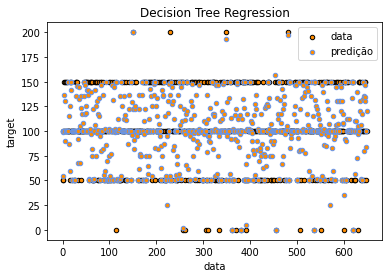

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

valores = []
for n in range(10,30,10):
    print(f"\nPara n = {n}:")
    reg_extt = ExtraTreesRegressor(n_estimators=n, random_state=81).fit(
               X_treino_norm, y_treino.ravel())

    resultado = reg_extt.predict(X_teste_norm).flatten().astype(dtype=np.int16)

    valores.append(evaluation(y_teste, resultado))
    
valores

# Plot the results
plt.figure()

plt.scatter(list(range(len(y_teste))), y_teste, s=20, edgecolor="black",
            c="darkorange", label="data")

plt.scatter(list(range(len(resultado))), resultado, s=20, edgecolor="cornflowerblue",
            c="darkorange", label="predição")

#plt.scatter(resultado,y_teste, color="green",
#         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [25]:
print(resultado[:10])
print(y_teste[:10])

[ 52.5        100.          99.83333333 100.18181818 137.5
  82.66666667 130.25       100.16666667 100.         100.        ]
[[ 50.]
 [100.]
 [ 50.]
 [100.]
 [150.]
 [100.]
 [150.]
 [150.]
 [100.]
 [150.]]


In [26]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_treino_norm, y_treino)

resultado = clf.predict(X_teste_norm)
evaluation(y_teste, resultado)

MSE: 1318.0 
 RMSE: 36.3
QWK: 0.243


In [27]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_treino_norm, y_treino)

resultado = neigh.predict(X_teste_norm)
evaluation(y_teste, resultado)

MSE: 1260.27 
 RMSE: 35.5
QWK: 0.367


In [28]:
knnr =  KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_treino_norm, y_treino) 

resultado = knnr.predict(X_teste_norm)
evaluation(y_teste, resultado)

MSE: 1324.2 
 RMSE: 36.39
QWK: 0.396


In [29]:
knnr =  KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_treino_norm, y_treino) 

resultado = knnr.predict(X_teste_norm)
evaluation(y_teste, resultado)

MSE: 1301.53 
 RMSE: 36.08
QWK: 0.372
